In [1]:
# import all necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# set columns names
col_Names=["sales_date", "sales_year", "cus_id", "cus_age",
           "cus_gender", "cus_country", "cus_state", "prod_category",
           "prod_subcategory", "product", "ord_quantity", "unit_cost", 
           "unit_price", "cost","revenue"]

# load dataset into a dataframe
df = pd.read_csv('sales_data.csv',
                 names= col_Names, 
                 on_bad_lines = 'skip',
                 sep= '\t')
# display first 5 rows of the dataset
df.head()

,sales_date,sales_year,cus_id,cus_age,cus_gender,cus_country,cus_state,prod_category,prod_subcategory,product,ord_quantity,unit_cost,unit_price,cost,revenue
0,2013-11-26,2013.0,11019.0,19.0,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,360.0,950.0
1,2015-11-26,2015.0,11019.0,19.0,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,360.0,950.0
2,2014-03-23,2014.0,11039.0,49.0,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1035.0,2401.0
3,2016-03-23,2016.0,11039.0,49.0,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,900.0,2088.0
4,2014-05-15,2014.0,11046.0,47.0,F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,180.0,418.0


In [3]:
# check daatypes of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113037 entries, 0 to 113036
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sales_date        113037 non-null  object 
 1   sales_year        113036 non-null  float64
 2   cus_id            113036 non-null  float64
 3   cus_age           113036 non-null  float64
 4   cus_gender        113036 non-null  object 
 5   cus_country       113036 non-null  object 
 6   cus_state         113036 non-null  object 
 7   prod_category     113036 non-null  object 
 8   prod_subcategory  113036 non-null  object 
 9   product           113036 non-null  object 
 10  ord_quantity      113036 non-null  float64
 11  unit_cost         113036 non-null  float64
 12  unit_price        113036 non-null  float64
 13  cost              113036 non-null  float64
 14  revenue           113036 non-null  float64
dtypes: float64(8), object(7)
memory usage: 12.9+ MB


In [4]:
df.duplicated().sum()

1000

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df[df['cus_age'].isna()]

,sales_date,sales_year,cus_id,cus_age,cus_gender,cus_country,cus_state,prod_category,prod_subcategory,product,ord_quantity,unit_cost,unit_price,cost,revenue
113036,\.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.dropna(inplace = True)

### Data Cleaning

#### Quality Issue
1. Improper datatype of sales date column
#### Tidiness Issue
1. Sales date column contains multiple variables

#### Define
Convert sales date column to a datetime datatype

#### Code

In [8]:
df['sales_date'] = pd.to_datetime(df['sales_date'])

#### Test

In [9]:
df['sales_date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 112036 entries, 0 to 113035
Series name: sales_date
Non-Null Count   Dtype         
--------------   -----         
112036 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.7 MB


#### Define
Split Sales date column into month and day

#### Code

In [10]:
# extract month variable
df['sales_month'] = pd.to_datetime(df['sales_date']).dt.strftime('%B')
# extract day name
df['sales_day'] = pd.to_datetime(df['sales_date']).dt.day_name()
# extract day
df['date'] = pd.to_datetime(df['sales_date']).dt.day

#### Test

In [11]:
df.sample()

,sales_date,sales_year,cus_id,cus_age,cus_gender,cus_country,cus_state,prod_category,prod_subcategory,product,ord_quantity,unit_cost,unit_price,cost,revenue,sales_month,sales_day,date
58776,2013-12-19,2013.0,12655.0,48.0,M,France,Hauts de Seine,Bikes,Road Bikes,"Road-150 Red, 52",1.0,2171.0,3578.0,2171.0,3328.0,December,Thursday,19


#### Define
Create a profit column

#### Code

In [12]:
# find the profit on each row
df['profit'] = df['revenue'] - df['cost']

#### Test

In [13]:
df['profit'].info()

<class 'pandas.core.series.Series'>
Int64Index: 112036 entries, 0 to 113035
Series name: profit
Non-Null Count   Dtype  
--------------   -----  
112036 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


In [14]:
df.describe()

,sales_year,cus_id,cus_age,ord_quantity,unit_cost,unit_price,cost,revenue,date,profit
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,2014.400925,19223.313917,35.919508,11.904254,267.819603,453.850628,471.103333,757.138527,15.665607,286.035194
std,1.273327,5306.209041,11.016543,9.564877,550.218722,922.751848,886.971635,1312.061623,8.781485,454.852634
min,2011.000000,11000.000000,17.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,-30.000000
25%,2013.000000,14608.000000,28.000000,2.000000,2.000000,5.000000,28.000000,64.000000,8.000000,29.000000
50%,2014.000000,18637.000000,35.000000,10.000000,9.000000,25.000000,112.000000,226.000000,16.000000,103.000000
75%,2016.000000,23470.000000,43.000000,20.000000,42.000000,70.000000,442.000000,806.000000,23.000000,360.000000
max,2016.000000,29483.000000,87.000000,32.000000,2171.000000,3578.000000,42978.000000,58074.000000,31.000000,15096.000000


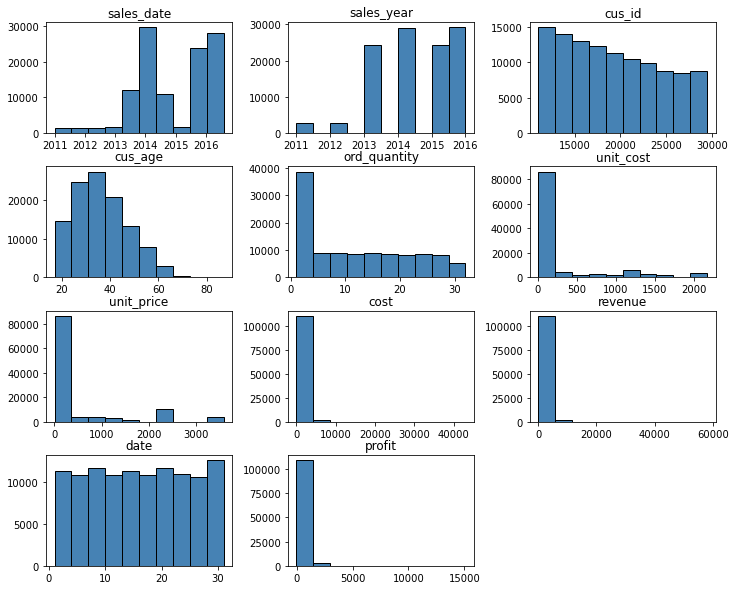

In [15]:
# visualize statistical summary
df.hist(grid = False, color = 'steelblue', edgecolor = 'black', figsize = (12,10));

### Write a query that returns the total profit made by BuyBuy from 1Q11 to 4Q16 (all quarters of every year).
First, lets compute total profit per year

In [16]:
profit_yr = df.groupby('sales_year')['profit'].sum()
profit_yr.reset_index()

,sales_year,profit
0,2011.0,2877185.0
1,2012.0,2938519.0
2,2013.0,5912432.0
3,2014.0,5818522.0
4,2015.0,7497361.0
5,2016.0,7002220.0


##### Create a table for the four Quarters in a year containing the total profit per quarter

In [17]:
# First quarter total profit
q1_pro = df.loc[df['sales_month'].isin(['January', 'February', 'March']), ['sales_year', 'sales_month', 'profit']]
q1 = q1_pro.groupby('sales_year')['profit'].sum().reset_index()
q1

,sales_year,profit
0,2011.0,643787.0
1,2012.0,650258.0
2,2013.0,454891.0
3,2014.0,2483287.0
4,2015.0,673496.0
5,2016.0,2992959.0


In [18]:
# Second quarter total profit
q2_pro = df.loc[df['sales_month'].isin(['April', 'May', 'June']), ['sales_year', 'sales_month', 'profit']]
q2 = q2_pro.groupby('sales_year')['profit'].sum().reset_index()
q2

,sales_year,profit
0,2011.0,672200.0
1,2012.0,704676.0
2,2013.0,521305.0
3,2014.0,3072401.0
4,2015.0,791648.0
5,2016.0,3755525.0


In [19]:
# Third quarter total profit
q3_pro = df.loc[df['sales_month'].isin(['July', 'August', 'September']), ['sales_year', 'sales_month', 'profit']]
q3 = q3_pro.groupby('sales_year')['profit'].sum().reset_index()
q3

,sales_year,profit
0,2011.0,787915.0
1,2012.0,798085.0
2,2013.0,2010783.0
3,2014.0,262834.0
4,2015.0,2462208.0
5,2016.0,253736.0


In [20]:
# Fourth quarter total profit
q4_pro = df.loc[df['sales_month'].isin(['October', 'November', 'December']), ['sales_year', 'sales_month', 'profit']]
q4 = q4_pro.groupby('sales_year')['profit'].sum().reset_index()
q4

,sales_year,profit
0,2011.0,773283.0
1,2012.0,785500.0
2,2013.0,2925453.0
3,2015.0,3570009.0


##### merge the quarterly tables into a single table


In [21]:
# merge the quarterly tables
df_q = pd.merge(pd.merge(q1,q2, on='sales_year'), q3,on='sales_year')
# rename the columns
df_q.rename(columns = {'profit_x':'Q1', 'profit_y':'Q2', 'profit':'Q3'}, inplace = True)

In [22]:
quarterly = pd.merge(df_q, q4, on='sales_year', how='left')
quarterly.rename(columns = {'profit':'Q4'}, inplace = True)
quarterly

,sales_year,Q1,Q2,Q3,Q4
0,2011.0,643787.0,672200.0,787915.0,773283.0
1,2012.0,650258.0,704676.0,798085.0,785500.0
2,2013.0,454891.0,521305.0,2010783.0,2925453.0
3,2014.0,2483287.0,3072401.0,262834.0,NaN
4,2015.0,673496.0,791648.0,2462208.0,3570009.0
5,2016.0,2992959.0,3755525.0,253736.0,NaN


### Write queries that return the total profit made by BuyBuy in Q2 of every year from 2011 to 2016.
Using the newly created table, quarterly:

In [23]:
q2 = quarterly[['sales_year', 'Q2']].set_index('sales_year')
q2 

,Q2
sales_year,
2011.0,672200.0
2012.0,704676.0
2013.0,521305.0
2014.0,3072401.0
2015.0,791648.0
2016.0,3755525.0


###  Create a chart to visualize the data from the analysis above

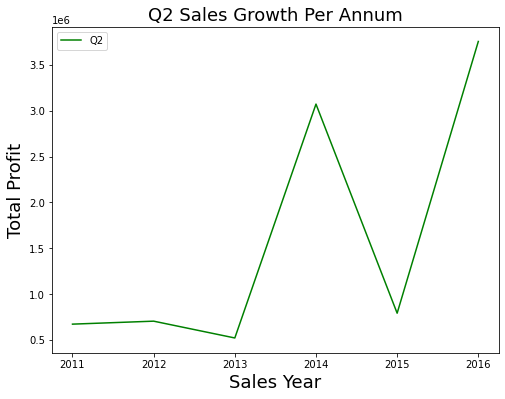

In [24]:
q2.plot(color = 'green', kind = 'line', figsize = (8, 6))
plt.xlabel('Sales Year', fontsize = 18)
plt.ylabel('Total Profit', fontsize = 18)
plt.title('Q2 Sales Growth Per Annum', fontsize = 18)
plt.legend();

### Write a query that returns the annual profit made by BuyBuy from the year 2011 to 2016.

In [25]:
df.groupby('sales_year')['profit'].sum().reset_index(name ='total_profit')

,sales_year,total_profit
0,2011.0,2877185.0
1,2012.0,2938519.0
2,2013.0,5912432.0
3,2014.0,5818522.0
4,2015.0,7497361.0
5,2016.0,7002220.0


### Write 2 queries that return the countries where BuyBuy has made the most profit and also the least profit of all-time. Your query must display both results on the same output

In [26]:
# customers countries and their total profit
most = df.groupby('cus_country')['profit'].sum().sort_values(ascending = False).reset_index()
most.set_index('cus_country', inplace = True)
most

,profit
cus_country,
United States,10997638.0
Australia,6740522.0
United Kingdom,4383987.0
Canada,3702019.0
Germany,3349991.0
France,2872082.0


In [27]:
print('-----------------COUNTRY LEAST PROFIT WAS MADE---------------')
print(df[['cus_country', 'prod_category', 'prod_subcategory', 'profit']].nsmallest(1, 'profit'))
print('-----------------COUNTRY MOST PROFIT WAS MADE----------------')
df[['cus_country', 'prod_category', 'prod_subcategory', 'profit']].nlargest(1, 'profit')

-----------------COUNTRY LEAST PROFIT WAS MADE---------------
      cus_country prod_category prod_subcategory  profit
48571      France      Clothing          Jerseys   -30.0
-----------------COUNTRY MOST PROFIT WAS MADE----------------


,cus_country,prod_category,prod_subcategory,profit
112073,Australia,Clothing,Vests,15096.0


In [28]:
# check the countries of ghe customers products were sold to
df['cus_country'].unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

### Write a query that shows the Top-10 most profitable countries for BuyBuy sales operations from 2011 to 2016

In [29]:
# select country, product category, subcategory and profit columns
chart = df[['cus_country', 'prod_category', 'prod_subcategory', 'profit']].nlargest(10, 'profit')
chart

,cus_country,prod_category,prod_subcategory,profit
112073,Australia,Clothing,Vests,15096.0
112072,Australia,Clothing,Vests,14055.0
57273,United States,Bikes,Mountain Bikes,5638.0
71129,Canada,Bikes,Road Bikes,5628.0
59919,Germany,Bikes,Road Bikes,5485.0
68671,Canada,Bikes,Road Bikes,5485.0
70307,Canada,Bikes,Road Bikes,5485.0
70597,Canada,Bikes,Road Bikes,5485.0
70601,Canada,Bikes,Road Bikes,5485.0
70699,Canada,Bikes,Road Bikes,5485.0


###  Create a chart to visualize the data from the analysis above

In [30]:
plt.figure(figsize=(10,6))

sb.countplot(data = chart, x = 'cus_country', y = 'profit', palette = ['#0000FF', '#FF0000', '#008000', '#FF0000'])

plt.title('Most Profitable and Least Profitable Countries', fontsize = 15)
plt.ylabel('Profit')
plt.xlabel("Country");

ValueError: Cannot pass values for both `x` and `y`

<Figure size 720x432 with 0 Axes>

###  Create a chart to visualize the data from the analysis above### Write a query that shows the Top-10 least profitable countries for BuyBuy sales operations from 2011 to 2016

In [ ]:
# select country, product category, subcategory and profit columns
df[['cus_country', 'prod_category', 'prod_subcategory', 'profit']].nsmallest(10, 'profit')